In [95]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import JulierSigmaPoints, unscented_transform

In [11]:
mymean = [12.3,7.6]
mycov = [[1.44,0],[0,2.89]]

In [12]:
x, y = np.random.multivariate_normal(mean = mymean, cov= mycov, size=10000).T

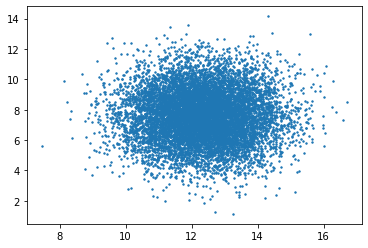

In [13]:
plt.scatter(x, y, s=2)


In [14]:
def f(x,y):
    return np.sqrt(x*x + y*y), np.arctan(y/x)

In [15]:
r, teta = f(x, y)

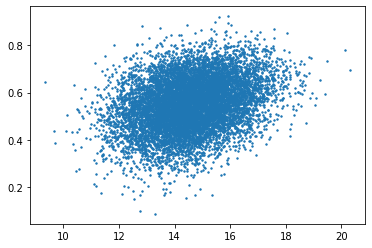

In [16]:
plt.scatter(r, teta, s=2)

In [17]:
np.mean(r),np.mean(teta)

(14.566049070153667, 0.5518233082694571)

In [18]:
f(np.mean(x), np.mean(y))

(14.48054648001036, 0.5549913547224089)

In [19]:
np.cov(x,y)

array([[1.39029898e+00, 7.07894619e-04],
       [7.07894619e-04, 2.89620468e+00]])

In [20]:
np.cov(r,teta)

array([[1.80269612, 0.04564557],
       [0.04564557, 0.01184342]])

In [105]:
sigmas = JulierSigmaPoints(n=2, kappa=1)
# MerweScaledSigmaPoints(n=3, alpha=.001, beta=2., kappa=1)

In [97]:
points = sigmas.sigma_points([np.mean(x), np.mean(y)], np.cov(x,y))
points

array([[12.3070888 ,  7.63032055],
       [14.34936619,  7.63136041],
       [12.3070888 , 10.57796587],
       [10.26481141,  7.62928069],
       [12.3070888 ,  4.68267523]])

In [100]:
mp = np.stack(f(points[:,0],points[:,1]),axis = 1)
mp

array([[14.48054648,  0.55499135],
       [16.2524451 ,  0.48878276],
       [16.22830233,  0.70998459],
       [12.7895378 ,  0.63916456],
       [13.16783513,  0.36357164]])

In [101]:
ukf_mean, ukf_cov = unscented_transform(mp, sigmas.Wm, sigmas.Wc)

In [102]:
ukf_mean, ukf_cov

(array([14.56653555,  0.55191438]),
 array([[1.788772  , 0.04401736],
        [0.04401736, 0.01201272]]))

In [103]:
np.mean(r),np.mean(teta)

(14.566049070153667, 0.5518233082694571)

In [104]:
np.cov(r,teta)

array([[1.80269612, 0.04564557],
       [0.04564557, 0.01184342]])